In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chats1/chats.csv


In [2]:
df=pd.read_csv('../input/chats1/chats.csv')
df.head()

,stage_name,first_name,last_name,email,content,sent_at
0,Lambda λ,Harish,Uthayakumar,harish.uthayakumar@zuddl.com,hi gopal,2022-06-13T15:55:15Z
1,Lambda λ,Gopalakrishnan,M,gopal.krishnan@zuddl.com,Hi,2022-06-13T15:55:45Z
2,Lambda λ,Harish,Uthayakumar,harish.uthayakumar@zuddl.com,lkjhg,2022-06-13T16:12:01Z
3,Lambda λ,Harish,Uthayakumar,harish.uthayakumar@zuddl.com,kjhgf,2022-06-13T16:12:16Z
4,Lambda λ,Saatvik,Koul,saatvik@analyticsvidhya.com,Am I audible?,2022-06-17T18:17:50Z


In [3]:
import re

In [4]:
df['content']=df['content'].astype(str)

In [5]:
que=df["content"].str.extract(r'(?P<questions>.+\?)')
#extract all questions

In [6]:
que

,questions
0,NaN
1,NaN
2,NaN
3,NaN
4,Am I audible?
...,...
6195,2.Apache Airflow Executors: Which of the follo...
6196,NaN
6197,NaN
6198,NaN


In [7]:
que.dropna(axis=0,inplace =True)

In [8]:
que.reset_index()

,index,questions
0,4,Am I audible?
1,29,"The dry run is done, right?"
2,60,Hi - Is there any audio?
3,68,1.Have you ever worked with any of the cluster...
4,69,1.Have you ever worked with any of the cluster...
...,...,...
917,6178,What type of metadata can be added before cond...
918,6180,@manish bhadauria cab you pls review my questi...
919,6181,Could you please share the link to dataset or ...
920,6194,"""1. Do you have hands-on experience with Apach..."


In [9]:
que=que.astype(str)

In [10]:
que['questions']=que["questions"].str.lower()

In [11]:
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('^[0-9.]+','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("\?",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing greeting
    text = text.replace("hi","")
    text= text.replace("good morning",'')
   
    # removing any reference to outside text
    text = re.sub("@[\w]*", "", str(text))
    
    return text

# preprocessing speeches
que['que_clean'] = que['questions'].apply(clean)

In [12]:
que['que_clean'] = que['que_clean'].str.replace("[^a-zA-Z#]", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [13]:
que

,questions,que_clean
4,am i audible?,am i audible
29,"the dry run is done, right?",the dry run is done right
60,hi - is there any audio?,is there any audio
68,1.have you ever worked with any of the cluster...,have you ever worked with any of the clusterin...
69,1.have you ever worked with any of the cluster...,have you ever worked with any of the clusterin...
...,...,...
6178,what type of metadata can be added before cond...,what type of metadata can be added before cond...
6180,@manish bhadauria cab you pls review my questi...,bhadauria cab you pls review my question
6181,could you please share the link to dataset or ...,could you please share the link to dataset or ...
6194,"""1. do you have hands-on experience with apach...",do you have hands on experience with apache...


for information extraction based on pos

In [14]:
import nltk
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [15]:
#text modelling
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:

import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [17]:

stop_words = stopwords.words('english')
# function to remove stopwords
#eliminate unimportant words, allowing applications to focus on the important words instead.
def remove_stopwords(word):
    content_new = " ".join([i for i in word if i not in stop_words])
    return content_new



# remove stopwords from the text
que_new = [remove_stopwords(c.split()) for c in que['que_clean']]

In [18]:
que_new

['audible',
 'dry run done right',
 'audio',
 'ever worked clustering algorithms',
 'ever worked clustering algorithms',
 'comfortable basic components graph networks',
 'come across applications graph networks day day life',
 'seem joined rooms sometng room ts please',
 'ok see camera',
 'access recorded sessions',
 'find weighted connections example want see movie titles together',
 'sorry spoiling party leverage networks business perspective',
 'attribute given restriect connection',
 'pls throw light practical applications network clusters',
 'download',
 'git link',
 'question share prominent business use cases research areas related cluster networks',
 'get ts notes wch shared screen right',
 'graph based clustering done actor pairs website shown',
 'clustering used blockchain',
 'get ts notes wch shared screen right',
 'neo j relevant',
 'similar neo j',
 'use ts deduplication customers',
 'clustering algorithm useful computer vision',
 'k means dbscan algorithms examples networ

In [19]:
questions=pd.Series(que_new)

In [20]:
questions

0                                                audible
1                                     dry run done right
2                                                  audio
3                      ever worked clustering algorithms
4                      ever worked clustering algorithms
                             ...                        
917    type metadata added conducting b test new feat...
918                    bhadauria cab pls review question
919                 could please share link dataset code
920                      hands experience apache airflow
921    apache airflow executors wch following default...
Length: 922, dtype: object

In [21]:
def freq_words(x, terms = 30):
  words = ' '.join([text for text in x])
  words = words.split()

  fdist = FreqDist(words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  return d

In [22]:
freq=freq_words(questions.values)

In [23]:
freq

,word,count
71,wch,68
108,data,65
25,ts,63
234,session,63
69,get,59
26,please,49
350,ai,39
369,notebook,35
833,pycaret,35
59,link,34


In [24]:
!python -m spacy download en # one time run

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/opt/conda/lib/python3.7/site-packages/en_core_web_sm -->
/opt/conda/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [25]:
#Let’s tokenize the reviews and then lemmatize the tokenized reviews.

tokenized_reviews = questions.apply(lambda x: x.split())
print(tokenized_reviews[1])

['dry', 'run', 'done', 'right']


In [26]:
tokenized_reviews

0                                              [audible]
1                                [dry, run, done, right]
2                                                [audio]
3                 [ever, worked, clustering, algorithms]
4                 [ever, worked, clustering, algorithms]
                             ...                        
917    [type, metadata, added, conducting, b, test, n...
918              [bhadauria, cab, pls, review, question]
919          [could, please, share, link, dataset, code]
920                 [hands, experience, apache, airflow]
921    [apache, airflow, executors, wch, following, d...
Length: 922, dtype: object

In [27]:
words=[]
for text in tokenized_reviews:
    for i in text:
        
        words.append(i)
print(words)      
    


['audible', 'dry', 'run', 'done', 'right', 'audio', 'ever', 'worked', 'clustering', 'algorithms', 'ever', 'worked', 'clustering', 'algorithms', 'comfortable', 'basic', 'components', 'graph', 'networks', 'come', 'across', 'applications', 'graph', 'networks', 'day', 'day', 'life', 'seem', 'joined', 'rooms', 'sometng', 'room', 'ts', 'please', 'ok', 'see', 'camera', 'access', 'recorded', 'sessions', 'find', 'weighted', 'connections', 'example', 'want', 'see', 'movie', 'titles', 'together', 'sorry', 'spoiling', 'party', 'leverage', 'networks', 'business', 'perspective', 'attribute', 'given', 'restriect', 'connection', 'pls', 'throw', 'light', 'practical', 'applications', 'network', 'clusters', 'download', 'git', 'link', 'question', 'share', 'prominent', 'business', 'use', 'cases', 'research', 'areas', 'related', 'cluster', 'networks', 'get', 'ts', 'notes', 'wch', 'shared', 'screen', 'right', 'graph', 'based', 'clustering', 'done', 'actor', 'pairs', 'website', 'shown', 'clustering', 'used', 

In [28]:
tagged = nltk.pos_tag(words)
tagged

[('audible', 'JJ'),
 ('dry', 'JJ'),
 ('run', 'NN'),
 ('done', 'VBN'),
 ('right', 'RB'),
 ('audio', 'JJ'),
 ('ever', 'RB'),
 ('worked', 'VBD'),
 ('clustering', 'VBG'),
 ('algorithms', 'NN'),
 ('ever', 'RB'),
 ('worked', 'VBD'),
 ('clustering', 'VBG'),
 ('algorithms', 'NN'),
 ('comfortable', 'JJ'),
 ('basic', 'JJ'),
 ('components', 'NNS'),
 ('graph', 'VBP'),
 ('networks', 'NNS'),
 ('come', 'VBP'),
 ('across', 'IN'),
 ('applications', 'NNS'),
 ('graph', 'VBP'),
 ('networks', 'NNS'),
 ('day', 'NN'),
 ('day', 'NN'),
 ('life', 'NN'),
 ('seem', 'VBP'),
 ('joined', 'VBN'),
 ('rooms', 'NNS'),
 ('sometng', 'JJ'),
 ('room', 'NN'),
 ('ts', 'NN'),
 ('please', 'NN'),
 ('ok', 'JJ'),
 ('see', 'NN'),
 ('camera', 'NN'),
 ('access', 'NN'),
 ('recorded', 'VBD'),
 ('sessions', 'NNS'),
 ('find', 'VBP'),
 ('weighted', 'JJ'),
 ('connections', 'NNS'),
 ('example', 'NN'),
 ('want', 'VBP'),
 ('see', 'VB'),
 ('movie', 'NN'),
 ('titles', 'NNS'),
 ('together', 'RB'),
 ('sorry', 'VBP'),
 ('spoiling', 'VBG'),
 ('part

In [29]:
list_words=[]
for i in tagged:
    if i[1] not in ["MD","IN","PRP","VBP","VBD","RB","VBN","VBZ","JJ","NNS",'VB']:
       
        list_words.append(i[0])

In [30]:
word_dist =nltk.FreqDist(list_words)


In [31]:
word_dist

FreqDist({'session': 63, 'share': 30, 'model': 30, 'ts': 28, 'please': 26, 'time': 26, 'learning': 26, 'link': 25, 'notebook': 24, 'r': 24, ...})

In [32]:
irrelevant=['session','please','share','notebook','sir','wch','using','get','stage','time','com','use','ts','access','link']
for i in irrelevant:
    word_dist.pop(i)
    while i in list_words: list_words.remove(i)
    

In [33]:
result = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])

In [34]:
result

,Word,Frequency
0,model,30
1,learning,26
2,r,24
3,recording,24
4,ml,22
5,drive,20
6,topic,20
7,internsp,19
8,image,18
9,processing,16


In [35]:
from wordcloud import WordCloud


In [36]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python

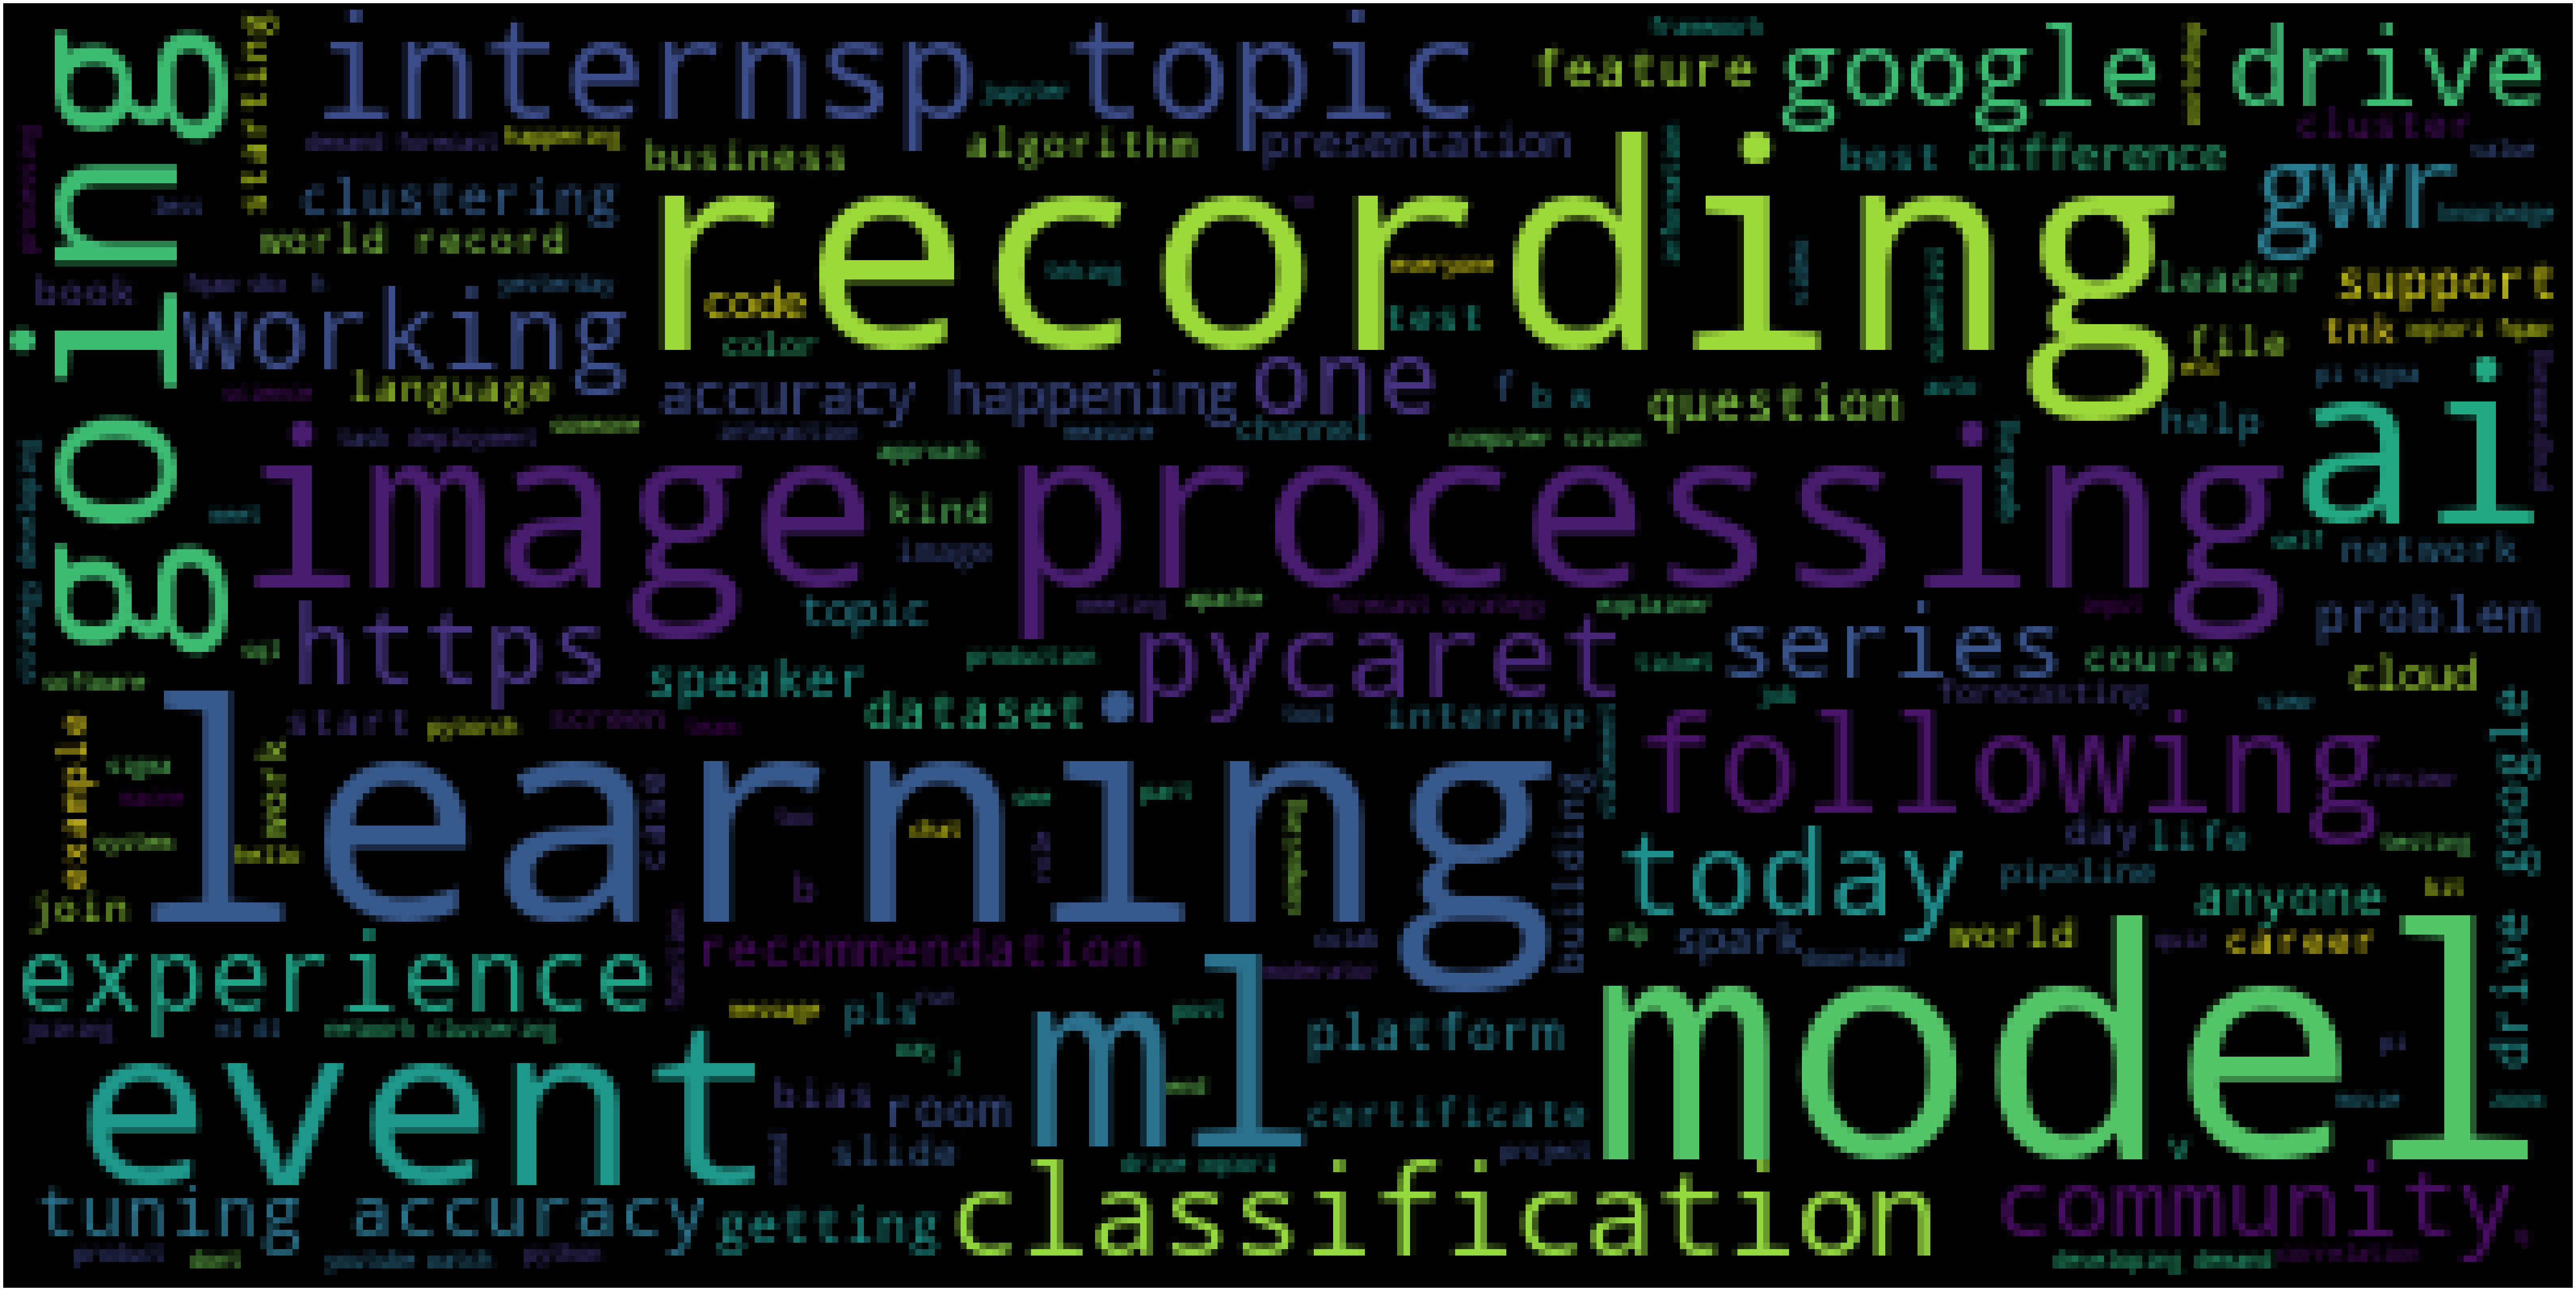

In [37]:
wc(list_words,'black','Common Words' )

In [38]:
list_words[8]

'room'

In [39]:
dictionary = corpora.Dictionary([words])


In [40]:
#Then we will convert  into a Document Term Matrix using the dictionary prepared above.

doc_term_matrix = [dictionary.doc2bow([rev]) for rev in words]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel



In [41]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [42]:
lda_model.print_topics()

[(0,
  '0.065*"data" + 0.053*"please" + 0.036*"share" + 0.031*"learning" + 0.019*"com" + 0.015*"stage" + 0.014*"know" + 0.014*"demand" + 0.011*"strategy" + 0.011*"pipeline"'),
 (1,
  '0.081*"ts" + 0.080*"session" + 0.045*"time" + 0.030*"recording" + 0.029*"used" + 0.025*"https" + 0.021*"possible" + 0.020*"google" + 0.015*"recorded" + 0.015*"happening"'),
 (2,
  '0.052*"link" + 0.048*"use" + 0.043*"model" + 0.033*"could" + 0.024*"sessions" + 0.019*"cloud" + 0.018*"going" + 0.016*"important" + 0.014*"happened" + 0.014*"pls"'),
 (3,
  '0.039*"ai" + 0.037*"notebook" + 0.027*"sir" + 0.027*"make" + 0.022*"image" + 0.021*"topic" + 0.018*"b" + 0.018*"experience" + 0.018*"processing" + 0.017*"internsp"'),
 (4,
  '0.078*"wch" + 0.027*"ml" + 0.023*"available" + 0.023*"r" + 0.022*"suggest" + 0.019*"projects" + 0.018*"working" + 0.017*"fo" + 0.017*"recordings" + 0.015*"series"'),
 (5,
  '0.064*"get" + 0.027*"drive" + 0.018*"right" + 0.018*"aws" + 0.017*"ever" + 0.017*"following" + 0.017*"would" + 0

In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.064373  0.109946       1        1  15.648138
3     -0.083100 -0.271796       2        1  15.186770
4     -0.056199  0.099047       3        1  15.142725
5     -0.044764  0.038039       4        1  14.648266
0      0.295336 -0.024020       5        1  13.571556
2     -0.023091  0.022054       6        1  13.000148
1     -0.023809  0.026730       7        1  12.802396, topic_info=           Term       Freq      Total Category  logprob  loglift
1476        wch  54.000000  54.000000  Default  30.0000  30.0000
1395         ts  47.000000  47.000000  Default  29.0000  29.0000
1197    session  47.000000  47.000000  Default  28.0000  28.0000
541         get  43.000000  43.000000  Default  27.0000  27.0000
318        data  41.000000  41.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
388        done   2.804954   3.441971   Topic7  -5.3360   1.8509
1463         vs   2.748496   3.385513   Topic7  -5.3563   1.8471
692   knowledge   2.735033   3.372049   Topic7  -5.3612   1.8462
1284  stopwords   2.622413   3.259432   Topic7  -5.4032   1.8381
1101   relevant   2.535816   3.172833   Topic7  -5.4368   1.8314

[240 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         6  0.896464      able
9         1  0.920963    access
11        2  0.966695  accuracy
33        2  0.973579        ai
34        5  0.812722   airflow
...     ...       ...       ...
1502      3  0.929274   working
1507      2  0.884700     world
1508      4  0.943720     would
1515      1  0.891377       xai
1520      7  0.727692       yes

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 5, 6, 1, 3, 2])

In [44]:
#BERT model

In [45]:
!pip install bertopic[visualization] --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.5.2 requires rich~=11.1, but you have rich 12.4.4 which is incompatible.


In [46]:

from copy import deepcopy
from bertopic import BERTopic

/opt/conda/lib/python3.7/site-packages/transformers/image_utils.py:188: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  def resize(self, image, size, resample=PIL.Image.BILINEAR, default_to_square=True, max_size=None):


In [47]:
model = BERTopic(language="english")

In [48]:
topics,probs = model.fit_transform(list_words)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [49]:
topics,probs = model.fit_transform(df["content"])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [50]:
model.get_topic_freq()

,Topic,Count
0,-1,1039
1,0,238
2,1,149
3,2,141
4,3,137
...,...,...
156,155,11
157,156,11
158,157,10
159,158,10


In [51]:
model.get_topic(0)

[('yes', 0.39559524509473626),
 ('nd', 0.020797274149251276),
 ('nibbles', 0.020797274149251276),
 ('momentum', 0.020797274149251276),
 ('hehehe', 0.020797274149251276),
 ('play', 0.011261488725035343),
 ('eric', 0.010441520890295894),
 ('think', 0.00890853943345478),
 ('ok', 0.008224082818742104),
 ('working', 0.007987772263768785)]

In [52]:
model.get_topic(1)

[('hi', 0.4312264946035477),
 ('amod', 0.07021117201293438),
 ('harshit', 0.03516622453187733),
 ('hiiii', 0.03156729111939926),
 ('anish', 0.03156729111939926),
 ('mowa', 0.03156729111939926),
 ('kesar', 0.03156729111939926),
 ('bro', 0.02747095545738845),
 ('ga', 0.02747095545738845),
 ('mr', 0.02747095545738845)]

In [53]:
model.get_topic(2)

[('1729ai', 0.7815646631027223),
 ('4380660', 0.06153494022455013),
 ('1728ai', 0.06153494022455013),
 ('gwr', 0.0362827966667888),
 ('gooooo', 0.035355366053727175),
 ('9170911141', 0.035355366053727175),
 ('91', 0.035355366053727175),
 ('8250395029', 0.035355366053727175),
 ('729ai', 0.035355366053727175),
 ('lets', 0.014194087676513827)]

In [54]:
model.visualize_topics()

In [55]:
model.visualize_barchart()